In [32]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets

In [5]:
import pandas as pd

titanic_df = pd.read_csv (r'C:\Users\pc\Downloads\titanic-passengers.csv', sep = ';')
print (titanic_df)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
88

In [6]:
column_names = titanic_df.columns
for column in column_names:
    print(column + ' - ' + str(titanic_df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [7]:
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("C23 C25 C27")

print(titanic_df["Cabin"].value_counts())

C23 C25 C27    691
G6               4
B96 B98          4
F2               3
F33              3
              ... 
E77              1
D11              1
C46              1
B4               1
B102             1
Name: Cabin, Length: 147, dtype: int64


In [8]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

print(titanic_df["Age"].value_counts())

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
66.000000      1
24.500000      1
80.000000      1
14.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64


In [9]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode())

print(titanic_df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
replacement_dict = {"Survived": {"Yes":1 ,"No":0}, "Sex": {"male":1, "female":0}}
titanic_df.replace(replacement_dict, inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C23 C25 C27,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C23 C25 C27,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C23 C25 C27,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [12]:
x = titanic_df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y = titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred = tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [18]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x, y)

In [47]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.770949720670391


In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [16]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(334.8, 380.52, 'X[2] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(167.4, 271.8, 'X[1] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(251.10000000000002, 163.07999999999998, 'X[6] <= 23.35\ngini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(209.25, 54.360000000000014, 'gini = 0.484\nsamples = 95\nvalue = [39, 56]'),
 Text(292.95, 54.360000000000014, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 1.5\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 187.0\ngini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 T

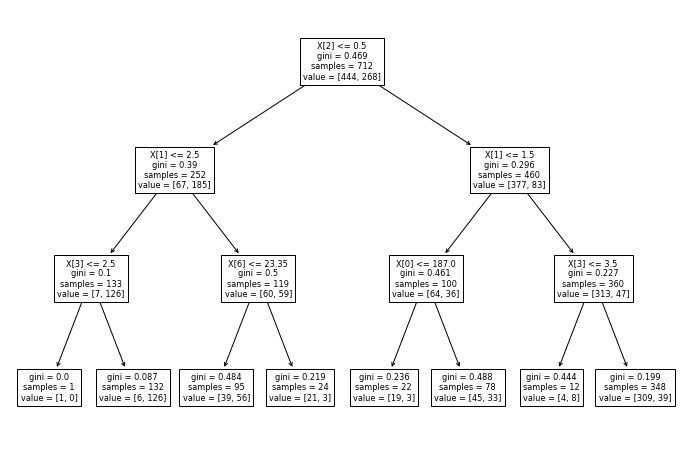

In [23]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

In [29]:
clf = DecisionTreeClassifier(random_state=1234,criterion="entropy", splitter="random")
model = clf.fit(x, y)

In [45]:
clf = DecisionTreeClassifier(random_state=1234,criterion="entropy", splitter="random")
model = clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.7821229050279329


The Comparison between scores

The first decision tree it gave us a 77% score and the second decision tree gave us a 78% score

In [41]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [51]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
model = regressor.fit(x_train, y_train)
acc = y_pred = regressor.predict(x_test)
print(acc)

[0.   0.8  0.45 0.35 0.3  0.1  0.   0.05 0.3  0.3  0.65 0.45 0.1  1.
 0.35 0.9  0.2  0.   1.   0.25 0.25 0.   0.9  0.55 1.   0.8  0.45 1.
 0.5  0.05 0.25 0.9  0.   0.1  0.2  0.   0.4  0.3  0.9  0.25 0.35 0.85
 0.65 0.05 0.   0.   0.4  0.05 0.15 1.   0.1  0.05 1.   0.3  0.05 0.15
 0.7  1.   0.95 0.45 0.7  0.3  0.   0.2  0.15 0.2  1.   0.   0.05 0.2
 1.   0.25 0.95 0.75 1.   0.25 0.1  0.35 0.1  0.6  0.6  0.95 0.7  0.
 0.2  0.85 0.2  0.6  0.5  0.25 0.   0.55 0.15 1.   1.   0.55 1.   0.
 0.85 0.45 0.65 0.15 0.3  1.   0.65 0.65 0.45 0.2  0.1  0.25 0.7  0.95
 0.2  0.05 0.3  0.1  1.   0.9  0.1  1.   0.65 0.6  0.   0.35 0.1  0.65
 0.15 0.15 1.   0.75 0.4  0.1  0.   0.   0.2  0.85 1.   0.15 0.1  0.65
 0.1  0.5  0.95 0.15 0.   0.4  0.3  0.   0.1  0.55 0.85 0.55 0.   0.25
 0.25 0.9  0.   0.1  0.05 0.9  0.2  0.2  0.05 1.   0.2  0.05 1.   0.
 0.05 0.   1.   0.65 1.   0.55 0.45 1.   0.95 0.2  0.  ]
